In [1]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries

import numpy as np
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import imblearn
from imblearn.over_sampling import SMOTE

In [4]:
# Read in data

TSS = pd.read_csv('/content/drive/MyDrive/IndependentProjects/GuardiansProject/CSVs/monthStatsTwitterAndStandings.csv')

In [5]:
# Create column for binary increase/decrease in twitter followers and per game columns

TSS['followerIncrease'] = (TSS['followerDiff'] > 0).astype(int)
TSS['runsScoredPerGame'] = TSS['runsScored'] / TSS['totalGames']
TSS['runsAllowedPerGame'] = TSS['runsAllowed'] / TSS['totalGames']
TSS['homeRunsPerGame'] = TSS['homeRuns'] / TSS['totalGames']
TSS['hitsPerGame'] = TSS['hits'] / TSS['totalGames']
TSS['strikeOutsPerGame'] = TSS['strikeOuts'] / TSS['totalGames']
TSS['strikeOutsPitchingPerGame'] = TSS['strikeOutsPitching'] / TSS['totalGames']
TSS['plateAppPerGame'] = TSS['plateAppearances'] / TSS['totalGames']
TSS['totalBasesPerGame'] = TSS['totalBases'] / TSS['totalGames']
TSS['rbiPerGame'] = TSS['rbi'] / TSS['totalGames']

seasonTSS = TSS[(TSS['totalGames'].notna()) & (TSS['pct'].notna())]

In [11]:
# Random forest model without SMOTE

# Set predictors and value to be predicted
X = seasonTSS[['runsScoredPerGame',
               'runsAllowedPerGame',
               'homeRunsPerGame',
               'hitsPerGame',
               'strikeOutsPerGame',
               'strikeOutsPitchingPerGame',
               'plateAppPerGame',
               'totalBasesPerGame',
               'rbiPerGame',
               'divisionRank',
               'pct'
              ]]
Y = seasonTSS['followerIncrease']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Print attributes of train/test/split
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.value_counts())
print()
print(y_test.value_counts())

# Create classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Apply model to test set and print accuracy scores with matrix
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

train_score = accuracy_score(predictions_train, y_train)
print("Accuracy score on training data: %.4f" % train_score)

test_score = accuracy_score(predictions_test, y_test)
print("Accuracy score on testing data: %.4f" % test_score)
print()

cc_m = confusion_matrix(y_test, predictions_test)
cc_matrix = pd.DataFrame(cc_m, index=['Actual Decrease','Actual Increase'], columns=['Predicted Decrease','Predicted Increase'])
print(cc_matrix)

# Print precision, recall, and F1
precision_test= precision_score(y_test, predictions_test)
recall_test= recall_score(y_test, predictions_test)
print('Precision:')
print(precision_test)
print()
print('Recall:')
print(recall_test)
print()
print('F1:')
print(f1_score(y_test, predictions_test))

(336, 11)
(144, 11)

1    307
0     29
Name: followerIncrease, dtype: int64

1    126
0     18
Name: followerIncrease, dtype: int64
Accuracy score on training data: 1.0000
Accuracy score on testing data: 0.8750

                 Predicted Decrease  Predicted Increase
Actual Decrease                   0                  18
Actual Increase                   0                 126
Precision:
0.875

Recall:
1.0

F1:
0.9333333333333333


In [12]:
# Random Forest model with SMOTE

# Set predictors and value to be predicted
X = seasonTSS[['runsScoredPerGame',
               'runsAllowedPerGame',
               'homeRunsPerGame',
               'hitsPerGame',
               'strikeOutsPerGame',
               'strikeOutsPitchingPerGame',
               'plateAppPerGame',
               'totalBasesPerGame',
               'rbiPerGame',
               'divisionRank',
               'pct'
              ]] 
Y = seasonTSS['followerIncrease'] 

# Use SMOTE to generate synthetic datapoints
oversample = SMOTE(random_state = 1)
X, Y = oversample.fit_resample(X, Y)

# Separate into train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Print train/test attributes
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.value_counts())
print()
print(y_test.value_counts())

# Create classifier
clf = RandomForestClassifier(n_estimators=100, random_state = 1)

clf.fit(X_train, y_train)

# Apply model to train and test sets and print results
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

train_score = accuracy_score(predictions_train, y_train)
print("Accuracy score on training data: %.4f" % train_score)

test_score = accuracy_score(predictions_test, y_test)
print("Accuracy score on testing data: %.4f" % test_score)
print()

cc_m = confusion_matrix(y_test, predictions_test)
cc_matrix = pd.DataFrame(cc_m, index=['Actual Decrease','Actual Increase'], columns=['Predicted Decrease','Predicted Increase'])
print(cc_matrix)

# Print precision, recall, F1
precision_test= precision_score(y_test, predictions_test)
recall_test= recall_score(y_test, predictions_test)
print('Precision:')
print(precision_test)
print()
print('Recall:')
print(recall_test)
print()
print('F1:')
print(f1_score(y_test, predictions_test))

(606, 11)
(260, 11)

1    309
0    297
Name: followerIncrease, dtype: int64

0    136
1    124
Name: followerIncrease, dtype: int64
Accuracy score on training data: 1.0000
Accuracy score on testing data: 0.9231

                 Predicted Decrease  Predicted Increase
Actual Decrease                 129                   7
Actual Increase                  13                 111
Precision:
0.940677966101695

Recall:
0.8951612903225806

F1:
0.9173553719008264


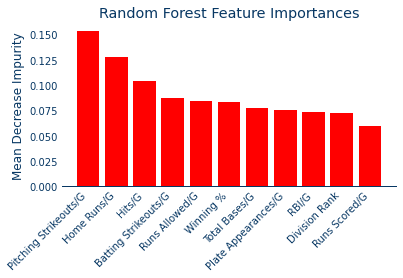

In [13]:
# Graph feature importances from random forest

feature_importances = pd.DataFrame(zip(X_train.columns,clf.feature_importances_),
                                  columns = ['feature','importance'])
feature_importances = feature_importances.sort_values(by='importance', ascending = False)

# initialize colors
navyBlue = '#073763'
red = '#ff0000ff'
gray = '#E6E6E6'
white = '#FFFFFF'

# create feature names
featureNames = ['Pitching Strikeouts/G',
                'Home Runs/G',
                'Hits/G',
                'Batting Strikeouts/G',
                'Runs Allowed/G',
                'Winning %',
                'Total Bases/G',
                'Plate Appearances/G',
                'RBI/G',
                'Division Rank',
                'Runs Scored/G'
                ]

plt.style.use('ggplot')

#create figure and axes, set facecolor
fig, ax = plt.subplots(figsize = (6,3))
ax.set_facecolor(white)


#create bar plot
ax.bar(feature_importances['feature'], feature_importances['importance'], color = red)

#set labels
ax.set_title('Random Forest Feature Importances', color = navyBlue)
#ax.set_xlabel('Division Rank', color = navyBlue)
ax.set_ylabel('Mean Decrease Impurity', color = navyBlue)

#format axes
ax.tick_params(colors=navyBlue)
ax.tick_params(length = 0) #remove tick marks
ax.spines['bottom'].set_color(navyBlue) #include x-axis line
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(featureNames, rotation = 45, ha="right")
plt.xticks(rotation = 45) 

plt.show()